<a href="https://colab.research.google.com/github/mortarialex/cienciadedados2/blob/main/cd2_0804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística
---
É um tipo de modelo que preve uma probabilidade de algo acontecer.

*y' = 1/1+e^(-z)*

Vamos começar esta aula sobre regressão logística usando um problema de classificação binária simples: como prever se um aluno será aprovado ou não com base em horas de estudo.

* **Variável independente (X):** Horas de estudo.
* **Variável dependente (y):** Aprovado (1) ou Reprovado (0).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dados = {
    "Horas_Estudo": [1, 2, 3, 4, 5, 6],
    "Aprovado": [0, 0, 0, 1, 1, 1]
}

## Passo 1: Função Logística
$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$

**Coeficientes hipotéticos**:
- $\beta_0 = -5 $
- $\beta_1 = 1.5 $

---

## Passo 2: Cálculo para X=4
$ z = -5 + 1.5 \times 4 = 1 $

$ P(y=1) = \frac{1}{1 + e^{-1}} $

**Contas passo a passo**:

 $ e^{-1} \approx 0.3679 $

 $ 1 + 0.3679 = 1.3679 $

 $ \frac{1}{1.3679} \approx 0.731 $


**Resultado**:
- Probabilidade de aprovação para 4 horas de estudo ≈ **73.1%**

---

## Passo 3: Ponto de Decisão (50%)
Encontre $X$ onde $ P(y=1) = 0.5$:

$ -5 + 1.5X = 0 $

$ 1.5X = 5 $

$ X = \frac{5}{1.5} \approx 3.33 $

**Interpretação**:
- Alunos que estudam **mais de 3.33 horas** têm >50% de chance de aprovação.


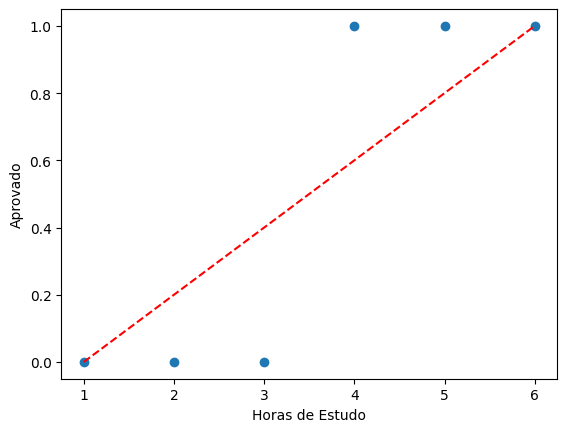

In [11]:
plt.scatter(dados["Horas_Estudo"], dados["Aprovado"])
plt.xlabel("Horas de Estudo")
plt.ylabel("Aprovado")

plt.plot([1, 6], [0, 1], color="red", linestyle="--")

plt.show()

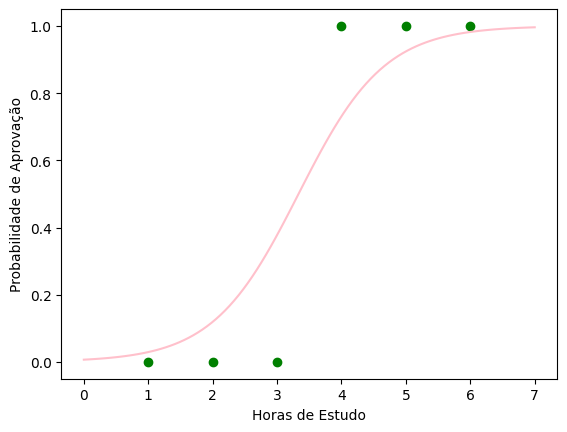

In [16]:
import numpy as np

curvaX = np.linspace(0, 7, 100)

# montar a sigmoide

probabilidade = 1 / (1 + np.exp(-(-5 +1.5*curvaX)))

plt.scatter(dados["Horas_Estudo"], dados["Aprovado"], color='green')
plt.plot(curvaX, probabilidade, color='pink')
plt.xlabel("Horas de Estudo")
plt.ylabel("Probabilidade de Aprovação")
plt.show()

In [19]:
# treinamento da regressão logística

from sklearn.linear_model import LogisticRegression

x = np.array(dados["Horas_Estudo"]).reshape(-1, 1)
y = dados["Aprovado"]

modelo = LogisticRegression()

modelo.fit(x, y)

LogisticRegression()

In [22]:
print("Coeficientes: ", modelo.coef_)
print("Intercepto: ", modelo.intercept_)

Coeficientes:  [[1.12069525]]
Intercepto:  [-3.9223039]


---
**Exercício:** Dado que agora encontramos os coeficientes reais dos dados, calcule manualmente: Encontre $X$ onde $ P(y=1) = 0.5$:

$ -3,92 + 1,12X = 0 $

$ 1,12X = 3,92 $

$ X = \frac{3,92}{1.12} \approx 3.5 $

Probabilidade para 4h:  0.6365629265347539
Previsão da classe para 4h:  [1]


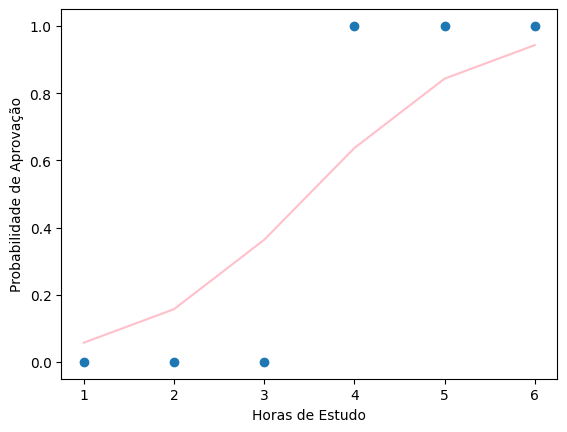

In [32]:
# Fazendo a previsão a partir do modelo de regressão logística induzido acima

print("Probabilidade para 4h: ", modelo.predict_proba([[4]])[0][1])
print("Previsão da classe para 4h: ", modelo.predict([[4]]))

plt.scatter(x,y)
plt.plot(x, modelo.predict_proba(x)[:, 1], color='pink')
plt.xlabel("Horas de Estudo")
plt.ylabel("Probabilidade de Aprovação")
plt.show()

In [35]:
dados_teste = {
    "Horas_Estudo": [6.5, 3.5, 4.5, 1.5, 5.5],
    "Aprovado": [0, 1, 1, 0, 1]
}

df_teste = pd.DataFrame(dados_teste)

In [39]:
# previsões

xTeste = df_teste["Horas_Estudo"].values.reshape(-1, 1)
df_teste["Aprovado (Previsto)"] = modelo.predict(xTeste)
df_teste["Probabilidade de Aprovação"] = modelo.predict_proba(xTeste)[:, 1]

df_teste

,Horas_Estudo,Aprovado,Aprovado (Previsto),Probabilidade de Aprovação
0,6.5,0,1,0.966503
1,3.5,1,1,0.500032
2,4.5,1,1,0.754142
3,1.5,0,0,0.096106
4,5.5,1,1,0.903917


In [40]:
from sklearn.metrics import accuracy_score

print("Acurácia do modelo: ", accuracy_score(df_teste["Aprovado"], df_teste["Aprovado (Previsto)"]))

Acurácia do modelo:  0.8


---
**Exercício 1:** Carregue os datasets ``dados_aprovacao_treino.csv`` e ``dados_aprovacao_teste.csv``. Analise quais são as colunas existentes e faça o treinamento do algoritmos de regressão logística. Em seguida, faça o teste do modelo de regressão induzido, utilizando o conjunto de dados de teste.

---
**Exercício 2:** avalie a necessidade de aplicar algum pré-processamento nos dados (identificação de outliers, normalização, desbalanceamento das classes, etc.) Em caso afirmativo, retreine e reavalie o modelo novamente. Lembre-se que o pré-processamento também precisa ser aplicado nos dados de teste.
Caso você verifique que nada disso é necessário, tente justificar o porquê.

---

Dicas:

* a regressão logísitca é robusta contra valores com escalas diferentes, ou seja, normalizar os dados tende a não ter tanto impacto assim neste algoritmo. Entretanto, isso não se aplica quando usamos regularização na regressão. Pesquise e estude mais sobre isso.

* a regressão logísitica também é robusta à outliers, mas não à prova. Então, sempre é válido averiguar sua existência

* ela é sensível ao desbalanceamento das classes. Se esse for o caso, pesquise e teste a biblioteca SMOTE que faz uma amostragem de forma facilitada.
  * from imblearn.over_sampling import SMOTE